In [1]:
import tensorflow as tf
import keras
import pandas
import sklearn
import matplotlib

import pandas as pd
df=pd.read_csv('housepricedata.csv')
df

2022-02-23 15:00:03.530809: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-23 15:00:03.530854: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [2]:
dataset = df.values
X = dataset[:,0:10]
Y = dataset[:,10]

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [4]:


from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

2022-02-23 15:00:49.055723: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-23 15:00:49.055750: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-23 15:00:49.055766: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Z238-UL): /proc/driver/nvidia/version does not exist
2022-02-23 15:00:49.107045: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 0.7032 - accuracy: 0.4765 - val_loss: 0.7008 - val_accuracy: 0.4155
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5049 - val_loss: 0.6915 - val_accuracy: 0.5525
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.6331 - val_loss: 0.6839 - val_accuracy: 0.6210
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6761 - val_loss: 0.6774 - val_accuracy: 0.6575
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.7231 - val_loss: 0.6710 - val_accuracy: 0.7215
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.7652 - val_loss: 0.6648 - val_accuracy: 0.7580
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.7857 - val_loss: 0.6585 - val_accuracy: 0.7717
Epoch 8/100
3

In [5]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2619 - accuracy: 0.8721


0.8721461296081543

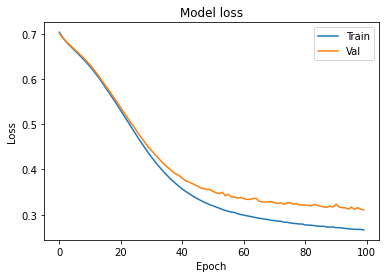

In [6]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

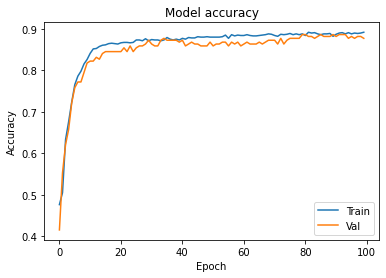

In [7]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [8]:

model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4640 - accuracy: 0.7838 - val_loss: 0.4162 - val_accuracy: 0.8265
Epoch 2/100
32/32 [==============================] - 1s 21ms/step - loss: 0.3482 - accuracy: 0.8562 - val_loss: 0.3895 - val_accuracy: 0.8311
Epoch 3/100
32/32 [==============================] - 1s 22ms/step - loss: 0.3255 - accuracy: 0.8689 - val_loss: 0.3547 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 1s 18ms/step - loss: 0.3060 - accuracy: 0.8728 - val_loss: 0.3719 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 1s 21ms/step - loss: 0.2762 - accuracy: 0.8796 - val_loss: 0.3596 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2495 - accuracy: 0.8982 - val_loss: 0.4775 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2971 - accuracy: 0.8885 - val_loss: 0.3551 - val_accuracy: 0.8539
Epoch 

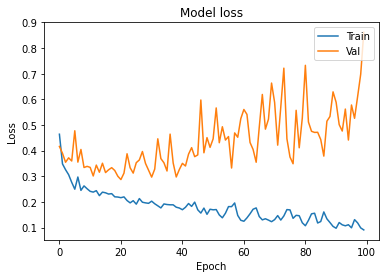

In [9]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
from keras.layers import Dropout
from keras import regularizers
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 34ms/step - loss: 14.2684 - accuracy: 0.6252 - val_loss: 3.9381 - val_accuracy: 0.8584
Epoch 2/100
32/32 [==============================] - 1s 29ms/step - loss: 1.6649 - accuracy: 0.8386 - val_loss: 0.7110 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5691 - accuracy: 0.8620 - val_loss: 0.5291 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4898 - accuracy: 0.8855 - val_loss: 0.5048 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5181 - accuracy: 0.8620 - val_loss: 0.5443 - val_accuracy: 0.8493
Epoch 6/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5348 - accuracy: 0.8581 - val_loss: 0.5376 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 1s 34ms/step - loss: 0.4684 - accuracy: 0.8806 - val_loss: 0.4807 - val_accuracy: 0.8813
Epoch

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show